## MARIANA CRUZ GÓMEZ



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from scipy.integrate import solve_ivp
from ipywidgets import interact
import time
from tqdm import tqdm

In [2]:
#Se definene los puntos cercanos a puntos de equilibrio 
y = np.linspace(-6,3, 150)
x= np.linspace(-6,3, 150)

#Parametros donde la potencia es variable 
@interact(p=(0, 3, 0.1))
def p(p=2):
  v=1
  m=d=0.1
  reactancia=0.5
  g = 0*x
  h = 1/d*(p-v/reactancia*np.sin(y))

  
  plt.figure(figsize=(10,6))
  plt.plot(x,g,x, h)
  plt.grid()
  plt.legend([r'$g(x)$', r'$h(x)$'])
  plt.xticks([-3*np.pi/2,-np.pi, -np.pi/2, 0, np.pi/2],[r'$-3\pi/2$',r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$'])
  plt.xlabel(r'$x$')
  plt.ylabel(r'$g(x)$, $h(x)$')

interactive(children=(FloatSlider(value=2.0, description='p', max=3.0), Output()), _dom_classes=('widget-inter…

In [3]:
#aqui y[1]= omega, y[0]=delta
@interact(p=(0, 3, 0.01))
def p(p=2):
  v=1
  reac=0.5
  d=0.1
  m=0.1
  def powersys (t,y,m,p,reac,d,v):
    return (y[1],1/m*(p-(v/reac)*np.sin(y[0])-d*y[1]))

  Ti,Tf=0,100
  t= np.linspace(Ti,Tf,100)
  y0=[np.pi/2-0.1,0.01]

  sol=solve_ivp(powersys,[Ti,Tf],y0,args=(m,p,reac,d,v),t_eval=t)

  plt.figure(figsize=(15,6))
  plt.subplot(121)
  plt.plot(t,sol.y[0], color="blue")
  plt.grid()
  plt.legend([r'$d(t)$'])
  plt.xlabel(r'$t$')
  plt.ylabel(r'$d$')

 
  plt.subplot(122)
  plt.plot(t,sol.y[1],color="red")
  plt.grid()
  plt.legend([r'$w(t)$'])
  plt.xlabel(r'$t$')
  plt.ylabel(r'$w$')


interactive(children=(FloatSlider(value=2.0, description='p', max=3.0, step=0.01), Output()), _dom_classes=('w…

In [4]:
#Se hallan los puntos de equilibrio del sistema
v=1
m=d=0.1
reactancia=0.5
p=2
r, c = sp.symbols('r, c', real=True)
R = c
C = 1/m*(p-v/reactancia*sp.sin(r)-d*c)

#Usando sympy se igualan las ecuacuaciones a cero
REqual = sp.Eq(R, 0)
CEqual = sp.Eq(C, 0)

fp = sp.solve( (REqual, CEqual), r, c )
print(fp)

[(1.57079632679490, 0.0)]


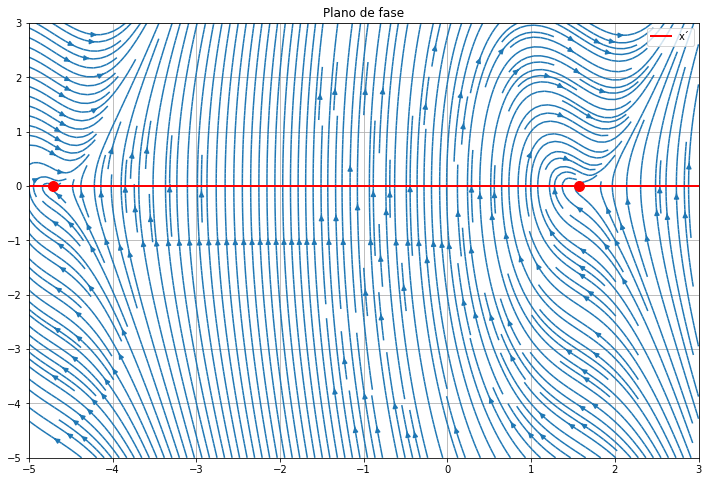

In [5]:
fp=[(1.57,0),(-4.71,0)]
v=1
reactancia=0.5
d=0.1
m=0.1
p=2
def Sys(X, t=0):
    # aqui X[0] = x and X[1] = y    
    return np.array([X[1] , 1/m*(p-v/reactancia*np.sin(X[0])-d*X[1])])


fig2 = plt.figure(figsize=(12,8))
ax4 = fig2.add_subplot(1,1,1)

#Graficas isoclinas
ax4.plot([-5,3],[0,0], 'r-', lw=2, label='x´')
#ax4.plot([1,1],[-1,3], 'b-', lw=2, label='y´')

#Se grafican los puntos de equilibrio
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Plano de fase")
ax4.legend(loc='best')

x = np.linspace(-5, 3, 60)
y = np.linspace(-5, 3, 60)


X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.streamplot (X1, Y1, DX1, DY1, density = 3)
ax4.legend()
ax4.grid()